# BU MET CS 779 Final Project Notebook

## Enron Emails: Processing Text Files to Create a Useful Analytical Tool

#### Cynthia Vint

This Jupyter notebook contains the code written and used for the data preprocessing of the Enron emails, publicly available at this [link](https://www.cs.cmu.edu/~./enron/). The steps required to preprocess and insert the data were exclusively performed using the below code, excluding the SQL executed in Oracle's SQL Developer client to create the tables. That being said, the tables could have also been created using the cx_Oracle module in Python with a connection to the image.



In [1]:
cd /Users/cynthia.vint/Desktop/BU\ MET\ CS\ 779

/Users/cynthia.vint/Desktop/BU MET CS 779


In [2]:
cd final_project

/Users/cynthia.vint/Desktop/BU MET CS 779/final_project


# Step 1: Convert File System to Dictionary

In [3]:
'''
Source: http://code.activestate.com/recipes/577879-create-a-nested-dictionary-from-oswalk/
'''

import os
import functools

def get_directory_structure(rootdir):
    """
    Creates a nested dictionary that represents the folder structure of rootdir
    """
    dir = {}
    rootdir = rootdir.rstrip(os.sep)
    start = rootdir.rfind(os.sep) + 1
    for path, dirs, files in os.walk(rootdir):
        folders = path[start:].split(os.sep)
        subdir = dict.fromkeys(files)
        parent = functools.reduce(dict.get, folders[:-1], dir)
        parent[folders[-1]] = subdir
    return dir


In [4]:
enron_dict = get_directory_structure('maildir')

In [5]:
def fetch_text(path_dict, path=''):
    for key in path_dict.keys():
        if type(path_dict[key]) == dict:
            if path == '':
                this_path = key
            else:
                this_path = path + '/' + key
            fetch_text(path_dict[key],this_path)
            
        else:
            if path_dict[key] is None:
                if path == '':
                    this_path = key
                else:
                    this_path = path + '/' + key
                with open(os.path.join(os.getcwd(),this_path),encoding='ascii',errors='ignore') as f:
                    content = f.readlines()
                content = [x.strip() for x in content] 
                path_dict[key] = content
                

In [6]:
fetch_text(enron_dict)

In [7]:
enron_dict['maildir']['ybarbo-p']['cabot']['1.']

['Message-ID: <19824315.1075851942322.JavaMail.evans@thyme>',
 'Date: Wed, 14 Feb 2001 06:27:00 -0800 (PST)',
 'From: dustin.collins@enron.com',
 'To: grampus@sunbeach.net',
 'Subject: Re: 2001 reconcilation',
 'Cc: dustin.collins@enron.com, todd.peterson@enron.com, radamiak@cabotlng.com,',
 'jmichalek@cabotlng.com, dan.masters@enron.com,',
 "paul.y'barbo@enron.com",
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'Bcc: dustin.collins@enron.com, todd.peterson@enron.com, radamiak@cabotlng.com,',
 'jmichalek@cabotlng.com, dan.masters@enron.com,',
 "paul.y'barbo@enron.com",
 'X-From: Dustin Collins',
 'X-To: "Chris Skinner" <grampus@sunbeach.net> @ ENRON',
 'X-cc: <dustin.collins@enron.com>@ENRON, "Todd. Peterson" <Todd.Peterson@enron.com>@ENRON, "Rudy Adamiak" <radamiak@cabotlng.com>@ENRON, "Jane Michalek" <jmichalek@cabotlng.com>@ENRON, Dan Masters, Paul Y\'Barbo',
 'X-bcc:',
 'X-Folder: \\Paul_Ybarbo_Nov2001\\Notes Folders\\Cabo

# Step 2: Create Email Objects from Text

In [8]:
class Email:
    
    #define email
    def __init__(self,date=None,
                from_address=None,
                to_address=None,
                body=None,
                subject=None,
                from_person=None,
                to_people=None,
                name = None):      #this will be an array of people
        
        self.date = date
        self.from_address = from_address
        self.to_address = to_address
        self.body = body
        self.subject = subject
        self.from_person = from_person
        self.to_person = to_people
        self.name = name
        
class Person:
    
    #define person
    def __init__(self,handle,
                folders,email=None,
                first_name=None,
                last_name=None):     #this will be an array of folders, each folder contains 1 or more emails.
        
        self.handle = handle
        self.email = email
        self.folders = folders
        self.first_name = first_name
        self.last_name = last_name
        
    def get_folder(self,folder_name):
        
        for folder in self.folders:
            if folder_name == folder.get_name():
                return folder
            
        return None
    
    def set_first_name(self,first_name_input):
        self.first_name = first_name_input
        
    def set_last_name(self,last_name_input):
        self.last_name = last_name_input
        
class Folder:
    
    def __init__(self,folder_name,
                items=None):
        self.folder_name = folder_name
        self.items = items
        
    def get_name(self):
        return self.folder_name
    
    def get_items(self):
        return self.items
    
    def add_item(self,new_item):
        self.items.append(new_item)

In [9]:
enron_dict_inner = enron_dict['maildir']

In [10]:
enron_dict_inner.keys()

dict_keys(['stokley-c', 'lokay-m', 'ward-k', 'scott-s', 'pereira-s', 'stclair-c', 'rodrique-r', 'slinger-r', 'may-l', 'swerzbin-m', 'cash-m', 'sturm-f', 'arora-h', 'hyatt-k', 'crandell-s', 'mcconnell-m', 'staab-t', 'kitchen-l', 'badeer-r', 'kuykendall-t', 'lokey-t', 'lucci-p', 'horton-s', 'tholt-j', 'dorland-c', 'allen-p', 'storey-g', 'grigsby-m', 'keavey-p', 'king-j', 'sanchez-m', 'thomas-p', 'gang-l', 'harris-s', 'taylor-m', 'gay-r', 'bailey-s', 'williams-w3', 'perlingiere-d', 'whalley-g', 'shively-h', 'sager-e', 'panus-s', 'schwieger-j', 'weldon-c', 'kaminski-v', 'delainey-d', 'lavorato-j', 'mann-k', 'sanders-r', 'cuilla-m', 'forney-j', 'derrick-j', 'dickson-s', 'stepenovitch-j', 'ermis-f', 'presto-k', 'arnold-j', 'linder-e', 'smith-m', 'scholtes-d', 'hodge-j', 'salisbury-h', 'solberg-g', 'keiser-k', 'farmer-d', 'love-p', 'germany-c', 'lay-k', 'heard-m', 'ring-a', 'bass-e', 'shankman-j', 'ring-r', 'campbell-l', 'dean-c', 'ruscitti-k', 'meyers-a', 'beck-s', 'guzman-m', 'rogers-b', 'c

In [11]:
'''
level 1: keys = handles for new people
level 2: keys = folder names for the sets of folders for people
level 3: keys = file names; items = text in the form of string lists

'X-FileName: GNEMEC (Non-Privileged).pst' : beginning of body
'-----Original Message-----' : end of body
'''
import re

def process_emails(email_dict,level=1):
    if level == 1:
        people = []
        for key in email_dict.keys():
            email_person = Person(handle=str(key),folders=process_emails(email_dict[key],level=2))
            people.append(email_person)
            
    elif level == 2:
        folders = []
        try:
            for key in email_dict.keys():
                email_folder = Folder(folder_name=str(key),items=process_emails(email_dict[key],level=3))
                folders.append(email_folder)
            return folders
        except AttributeError:
            #print(email_dict)
            return None
            
    elif level == 3:
        emails = []
        try:
            for key in email_dict.keys():
            
                email_data = email_dict[key]
                name = key
                date = None
                from_add = None
                to_add = None
                body = ''
                subject = None
                body_scan = False

                for datum in email_data:
                    if 'Date:' in datum and date is None:
                        datum = datum[5:].strip()
                        date = datum

                    elif 'From:' in datum and from_add is None:
                        datum = datum[5:].strip()
                        from_add = datum

                    elif 'To:' in datum and to_add is None:
                        datum = datum[3:].strip()
                        to_add = datum

                    elif 'Subject:' in datum and subject is None:
                        subject = datum[8:].strip()

                    elif 'X-FileName' in datum:
                        body_scan = True

                    elif body_scan:
                        
                        if re.match(r'^\\"', datum):
                            body_scan = False
                        
                        elif datum:
                            body = body + ' ' + datum
                        
                            


                email = Email(date=date,from_address=from_add,
                             to_address=to_add,body=body,subject=subject, name=name)
                emails.append(email)
            return emails
        
        except AttributeError:
            #print(email_dict)
            return None
            
    return people

In [12]:
processed_data = process_emails(enron_dict_inner)

In [13]:
processed_data[0]

In [14]:
len(processed_data)

151

In [15]:
processed_data[2].folders[1].get_items()[0].body

' Kim, Please disregard previous draft for C of Glendale,  this is a corrected draft. Debra Perlingiere Enron North America Corp. Legal Department 1400 Smith Street, EB 3885 Houston, Texas 77002 dperlin@enron.com Phone 713-853-7658 Fax  713-646-3490 ----- Forwarded by Debra Perlingiere/HOU/ECT on 03/29/2001 04:42 PM ----- Dan J Hyvl 03/29/2001 08:14 AM To: Debra Perlingiere/HOU/ECT@ECT cc: Subject: City of Glendale Debra, I had a type in the definition of Material Adverse Change.  Please resend if necessary.'

# Custom Solution to Insert into Database

On the database end (not within the scope of this notebook), I had to create a schema that matched the schema, if you will, of the Python dictionary. The SQL DDL code was run as seen below:

```
CREATE TABLE PERSON (
  HANDLE VARCHAR(20) PRIMARY KEY,
  EMAIL_ADDRESS VARCHAR(40),
  FIRST_NAME VARCHAR(40),
  LAST_NAME VARCHAR(40)
);

CREATE TABLE FOLDER (
  PERSON_HANDLE VARCHAR(20) REFERENCES PERSON(HANDLE),
  FOLDER_NAME VARCHAR(100),
  FOLDER_ID NUMBER PRIMARY KEY
);

CREATE SEQUENCE FOLDER_SEQ
START WITH 1;

CREATE OR REPLACE TRIGGER FOLDER_TRIGGER 
BEFORE INSERT ON FOLDER 
FOR EACH ROW

BEGIN
  SELECT FOLDER_SEQ.NEXTVAL
  INTO   :NEW.FOLDER_ID
  FROM   DUAL;
END;
/

CREATE TABLE EMAIL (
  EMAIL_NAME VARCHAR(50),
  EMAIL_SUBJECT CLOB,
  EMAIL_BODY CLOB,
  TO_ADDRESS_LIST CLOB,
  FROM_ADDRESS VARCHAR(4000),
  DATE_SENT DATE,
  FOLDER_ID NUMBER REFERENCES FOLDER(FOLDER_ID),
  EMAIL_ID NUMBER PRIMARY KEY
);

CREATE SEQUENCE EMAIL_SEQ
START WITH 1;

CREATE OR REPLACE TRIGGER EMAIL_TRIGGER 
BEFORE INSERT ON EMAIL 
FOR EACH ROW

BEGIN
  SELECT EMAIL_SEQ.NEXTVAL
  INTO   :NEW.EMAIL_ID
  FROM   DUAL;
END;
/

```

Now that it has been created, we can add data to the database from the Python Dictionary. I know that some of the above schema is redundant, and I will definitely look into continually improving it for future use. 

In [1]:
import cx_Oracle

dsn = cx_Oracle.makedsn('localhost', 32771, 'xe')
con = cx_Oracle.connect('system', 'oracle', dsn)

In [2]:
curs = con.cursor()

In [ ]:
#If you need to start over
curs.execute('DELETE FROM EMAIL')

In [ ]:
curs.execute('DELETE FROM FOLDER')

In [ ]:
curs.execute('DELETE FROM PERSON')

In [ ]:
#rollback if you change your mind
con.rollback()

In [21]:
curs.execute('SELECT handle from person')
data = curs.fetchall()
handles_added = [datum[0] for datum in data]
handles_added[:5]

['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s']

In [22]:
'''
Insert all of the people
note: date format: Tue, 16 Jan 2001 16:18:00 -0800 (PST)
'''

import re
from cx_Oracle import DatabaseError

# insert all of the data
for item in processed_data:
    
    if item.handle not in handles_added:
        #find person's email address
        if item.folders:
            email_add = ''
            for folder in item.folders:

                if 'sent' in folder.get_name():
                    email_add = folder.get_items()[0].from_address
                    email_add = re.sub('\'', '_',email_add)
                    print(email_add)
                    if email_add:
                        string = 'INSERT INTO PERSON (HANDLE, EMAIL_ADDRESS) VALUES (\''+item.handle+ '\', \'' + email_add + '\')'
                        curs.execute(string)
                        break

            if not email_add:
                string = 'INSERT INTO PERSON (HANDLE) VALUES (\''+item.handle+ '\')'
                curs.execute(string)
            
            handles_added.append(item.handle)

            for folder in item.folders:

                string = 'INSERT INTO FOLDER (PERSON_HANDLE, FOLDER_NAME) VALUES (\'' + item.handle + '\',\'' +\
                folder.get_name() + '\')'
                curs.execute(string)

                if folder.get_items():
                    for email in folder.get_items():

                        #EMAIL_NAME VARCHAR(30),
                        #EMAIL_SUBJECT VARCHAR(500),
                        #EMAIL_BODY VARCHAR(2000),
                        #TO_ADDRESS_LIST VARCHAR(100),
                        #FROM_ADDRESS VARCHAR(100),
                        #DATE_SENT DATE
                        string = ''

                        if '\'' in email.body:
                            email.body = re.sub('\'', ' ', email.body)

                        if email.subject is None:
                            email.subject= 'No Subject'
                        elif '\'' in email.subject:
                            email.subject = re.sub('\'', ' ', email.subject)

                        if email.to_address is None:
                            email.to_addres = 'No to address'
                        elif '\'' in email.to_address:
                            email.to_address = re.sub('\'', ' ', email.to_address)

                        if email.from_address is None:
                            email.from_addres = 'No from address'
                        elif '\'' in email.from_address:
                            email.from_address = re.sub('\'', ' ', email.from_address)

                        #print(len(email.body), '\n')

                        body_short = email.body[:4000]
                        subject_short = email.subject[:4000]
                        if email.to_address:
                            to_short = email.to_address[:4000]
                        else:
                            to_short = 'No to address'
                        if email.from_address:
                            from_short = email.from_address[:4000]
                        else:
                            from_short = 'No from address'

                        if email.date:
                            email_date = re.sub('\-0\d00 ', '',email.date.strip())
                            try:
                                string = 'INSERT INTO EMAIL ( EMAIL_SUBJECT, EMAIL_NAME, \
                                EMAIL_BODY, TO_ADDRESS_LIST, FROM_ADDRESS, DATE_SENT, FOLDER_ID)\
                                VALUES (\'' + str(subject_short) + '\', \'' + email.name + '\', \'' + str(body_short) + '\', \
                                \'' + str(to_short)+ '\', \'' + str(from_short) + '\', \
                                TO_TIMESTAMP_TZ(\'' + str(email_date) + '\',\'DY, DD MON YYYY HH24:MI:SS (TZD)\'),\
                                (SELECT FOLDER_ID FROM FOLDER WHERE FOLDER_NAME = \'' + str(folder.get_name()) + '\' \
                                AND PERSON_HANDLE = \'' + str(item.handle) + '\'))'
                                curs.execute(string)
                                #print('date captured')

                            except DatabaseError:
                                string = 'INSERT INTO EMAIL ( EMAIL_SUBJECT, EMAIL_NAME, \
                                EMAIL_BODY, TO_ADDRESS_LIST, FROM_ADDRESS, FOLDER_ID)\
                                VALUES (\'' + str(subject_short) + '\', \'' + email.name + '\',\'' + str(body_short) + '\', \
                                \'' + str(to_short) + '\', \'' + str(from_short) + '\',\
                                (SELECT FOLDER_ID FROM FOLDER WHERE FOLDER_NAME = \'' + str(folder.get_name()) + '\'\
                                AND PERSON_HANDLE = \'' + str(item.handle) + '\'))'
                                curs.execute(string)

                        else:
                            string = 'INSERT INTO EMAIL ( EMAIL_SUBJECT, EMAIL_NAME,\
                            EMAIL_BODY, TO_ADDRESS_LIST, FROM_ADDRESS, FOLDER_ID)\
                            VALUES (\'' + str(subject_short) + '\', \'' + email.name + '\',\'' + str(body_short) + '\', \
                            \'' + str(to_short) + '\', \'' + str(from_short) + '\', \
                            (SELECT FOLDER_ID FROM FOLDER WHERE FOLDER_NAME = \'' + str(folder.get_name()) + '\'\
                            AND PERSON_HANDLE = \'' + str(item.handle) + '\'))'

                            curs.execute(string)

        #print(string)


elizabeth.linnell@enron.com
john.griffith@enron.com
mark.whitt@enron.com
zionette.vincent@enron.com
kimberly.watson@enron.com
d..steffes@enron.com
lindy.donoho@enron.com
andrew.lewis@enron.com
phillip.platter@enron.com
dutch.quigley@enron.com
matt.motley@enron.com
cooper.richey@enron.com
shelley.corman@enron.com
sherri.sera@enron.com
cara.semperger@enron.com
scott.neal@enron.com
stephanie.panus@enron.com
don.baughman@enron.com
jason.wolfe@enron.com
joe.quenet@enron.com
matthew.lenhart@enron.com
errol.mclaughlin@enron.com
lynn.blair@enron.com
drew.fossum@enron.com
steven.south@enron.com
judy.hernandez@enron.com
eric.saibi@enron.com
dan.hyvl@enron.com
john.zufferli@enron.com
liz.taylor@enron.com
thomas.martin@enron.com
keith.holst@enron.com
mark.fisher@enron.com
darrell.schoolcraft@enron.com
steven.merris@enron.com
lysa.akin@enron.com
danny.mccarty@enron.com
vladi.pimenov@enron.com
kate.symes@enron.com
gerald.nemec@enron.com
scott.hendrickson@enron.com
brad.mckay@enron.com
joe.parks@enro

In [ ]:
# isloate the dates and insert
count = 0
for person in processed_data:
    
    if person.folders:
        for folder in person.folders:
        
            if folder.get_items():
                for email in folder.get_items():
            
                    if email.date:
                        
                        email_no_offset = re.sub('\-0\d00 ', '',email.date)
                        if count % 10000 == 0:
                            print(email_no_offset)
                            
                        curs.execute('UPDATE EMAIL SET DATE_SENT = \
                        TO_TIMESTAMP_TZ(\'' + email_no_offset + '\',\'DY, DD MON YYYY HH24:MI:SS (TZD) \')\
                        WHERE FOLDER_ID = (SELECT FOLDER_ID FROM FOLDER WHERE PERSON_HANDLE = \'' + person.handle+ '\') AND \
                        EMAIL.EMAIL_NAME = \'' + email.)')
            
                    count += 1

Wed, 6 Jun 2001 02:38:00 (PDT)


### Query the Database

In [3]:
#get total number of emails
curs.execute('SELECT COUNT(*) FROM EMAIL')
email_count = curs.fetchall()
email_count = email_count[0]
email_count = email_count[0]
print('Number of emails:',email_count)

#get number of non-null email bodies
curs.execute('SELECT COUNT(*) FROM EMAIL WHERE LENGTH(EMAIL_BODY) != 0')
body_count = curs.fetchall()
body_count = body_count[0][0]
print('Number of non-null email bodies:',body_count)

#get dates from emails
curs.execute('SELECT COUNT(*) FROM EMAIL WHERE DATE_SENT IS NOT NULL')
dates = curs.fetchall()
print('Number of non-null dates:',dates[0][0])

curs.execute('SELECT * FROM (SELECT EMAIL_BODY FROM EMAIL ORDER BY DBMS_RANDOM.RANDOM) WHERE  rownum <= 5000\
            AND EMAIL_BODY IS NOT NULL')
emails = []
email = curs.fetchone()
while email:
    emails.append(email[0].read())
    try:
        email = curs.fetchone()
    except Error:
        email = None

Number of emails: 490706
Number of non-null email bodies: 490245
Number of non-null dates: 490245


In [4]:
print(emails[:3])

[' Debra, For clarification, the cp s collateral threshold should be $0.00 instead of N/A.  sorry for any inconvenience. Tracy ---------------------- Forwarded by Tracy Ngo/PDX/ECT on 12/15/2000 08:45 AM --------------------------- Tracy Ngo 12/15/2000 07:34 AM To: Debra Perlingiere/HOU/ECT@ECT cc: Dan J Hyvl/HOU/ECT@ECT, Dave Fuller/PDX/ECT@ECT, Jason R Williams/NA/Enron@ENRON, Edward Sacks/Corp/Enron@Enron, Wendy Conwell/NA/Enron@ENRON, Veronica Espinoza/Corp/Enron@ENRON, Russell Diamond/HOU/ECT@ECT, William S Bradford/HOU/ECT@ECT Subject: Oregon Steel Mills, Inc. Debra, Attached please find a credit worksheet for a draft Master Firm Purchase and Sale Agreement between Enron North America Corp. and Oregon Steel Mills, Inc.  Please call w/any questions.  Jay Williams in Credit for Gas will be the lead credit contact on this relationship. Regards, Tracy 503-464-8755', ' ----- Forwarded by Susan J Mara/NA/Enron on 11/01/2000 11:29 AM ----- US Publishing <season@restructuringtoday.com> 1

In [29]:
#clean text data for wordcloud
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from stop_words import get_stop_words
import re

stops = get_stop_words('en')
stemmer = LancasterStemmer()

cleaned_emails = []

for email in emails:
    
    #clean out urls, special characters, etc
    email = re.sub('(^\s)+@(^\s)\.(^s)', " ", email)
    email = re.sub('\d+', ' ', email)
    email = re.sub('\'(s)?', ' ', email)
    email = re.sub('http(^\s)+', ' ', email)
    email = re.sub('www\.(^\s)\.com', ' ', email)
    email = re.sub('^[a-zA-Z]', ' ', email)
    
    #tokenize, stem, reassemble
    tokens = word_tokenize(email)
    clean_str = ''
    for token in tokens:
        if token not in stops:
            clean_str += stemmer.stem(token) + ' '
            
    cleaned_emails.append(clean_str)
    

In [30]:
%matplotlib inline

In [31]:
#visualize time series of dates
import matplotlib.pyplot as plt

In [32]:
cd /Users/cynthia.vint/Desktop/BU\ MET\ CS\ 779/final_project

/Users/cynthia.vint/Desktop/BU MET CS 779/final_project


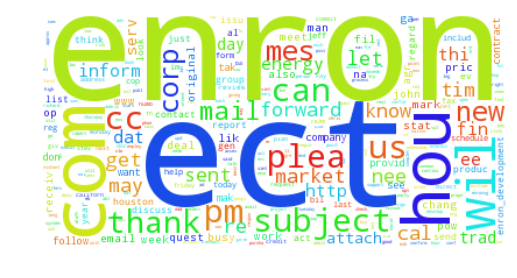

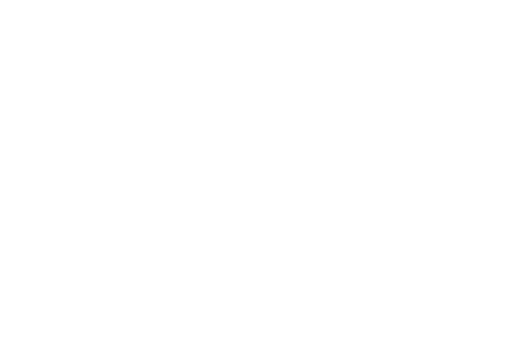

In [33]:
# Simple Word Cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np

#combine emails into single text
combined_email = ''
for email in cleaned_emails:
    combined_email += ' ' + email
    
#download enron image
#enron_mask = np.array(Image.open('Enron_logo.png'))

wc = WordCloud(background_color="white", max_words=2000, 
               stopwords=stops)

# generate word cloud
wc.generate(combined_email)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
#plt.imshow(enron_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [34]:
#get top 10 email writers

curs.execute('SELECT FOLDER.PERSON_HANDLE, COUNT(*) AS NUM_EMAILS\
            FROM FOLDER JOIN EMAIL ON EMAIL.FOLDER_ID = FOLDER.FOLDER_ID\
            GROUP BY FOLDER.PERSON_HANDLE\
            ORDER BY NUM_EMAILS DESC FETCH FIRST 10 ROWS ONLY')

top_ten = curs.fetchall()

In [35]:
top_ten = dict(top_ten)

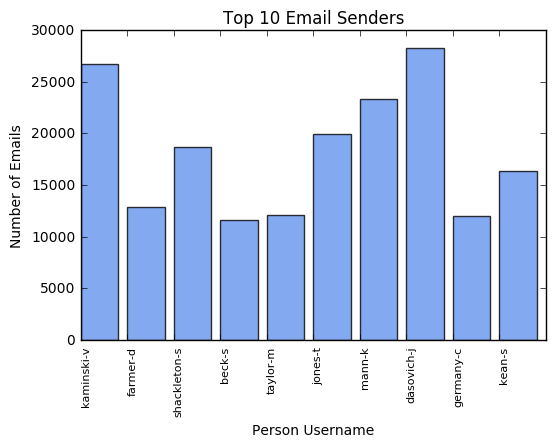

In [36]:
fig, ax = plt.subplots()

index = list(range(len(top_ten.values())))
bar_width = 0.5

labels = top_ten.keys()

opacity = 0.8

rects = plt.bar(index, top_ten.values(),alpha=opacity,\
                 color='cornflowerblue')

plt.xlabel('Person Username')
plt.xticks(index, labels, rotation='vertical',fontsize=8, ha='left')
plt.ylabel('Number of Emails')
plt.title('Top 10 Email Senders')

plt.show()

In [5]:
#example time series analysis
curs.execute('SELECT EMAIL.DATE_SENT FROM EMAIL JOIN FOLDER \
            ON EMAIL.FOLDER_ID = FOLDER.FOLDER_ID \
            JOIN PERSON ON PERSON.HANDLE = FOLDER.PERSON_HANDLE \
            WHERE FOLDER.PERSON_HANDLE = \'dasovich-j\' AND EMAIL.DATE_SENT IS NOT NULL')

dasovich_dates = curs.fetchall()
dasovich_dates = [date[0] for date in dasovich_dates]

In [24]:
con.commit()

In [170]:
con.close()

### Future Directions

I intend to utilize this database to show how it can easily facilitate the reproduction of other research projects on the same dataset, such as the one at [Berkeley](https://www.stat.berkeley.edu/~aldous/Research/Ugrad/HarishKumarReport.pdf) by Harish Kumar Palaniswamy.

Also, using this database, I hope to provide the tools to build further on Analytical research, such as in the field of Human Resources research, in which email activity reveals a lot of information about human behavior and networking in the workplace.